# Example for life cycle assessment module of AeroMAPS


## Load and process

First, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
import pandas as pd
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_bottom_up,
    models_energy_without_fuel_effect,
    models_offset,
    models_climate_simple_gwpstar,
    models_sustainability,
)
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_numeric import FleetEvolution
from aeromaps.models.impacts.life_cycle_assessment.life_cycle_assessment import LifeCycleAssessment
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
)

In [2]:
extended_models = {
    "models_traffic": models_traffic,
    "models_efficiency_bottom_up": models_efficiency_bottom_up,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
    "fleet_numeric": FleetEvolution("fleet_numeric"),
    "life_cycle_assessment": LifeCycleAssessment(
        "life_cycle_assessment",
        reset=False,
    )
}

Initial setup of EcoInvent/Premise already done, skipping. To reset the project use option `reset=True`.
Building LCA model from configuration file... Done.
Parametrizing LCIA impacts... Done.


In [99]:
process = create_process(
    configuration_file="data_files/config.json",
    models=extended_models,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False
)

In [100]:
#process.list_float_inputs()

## Input parameters

ReFuelEU

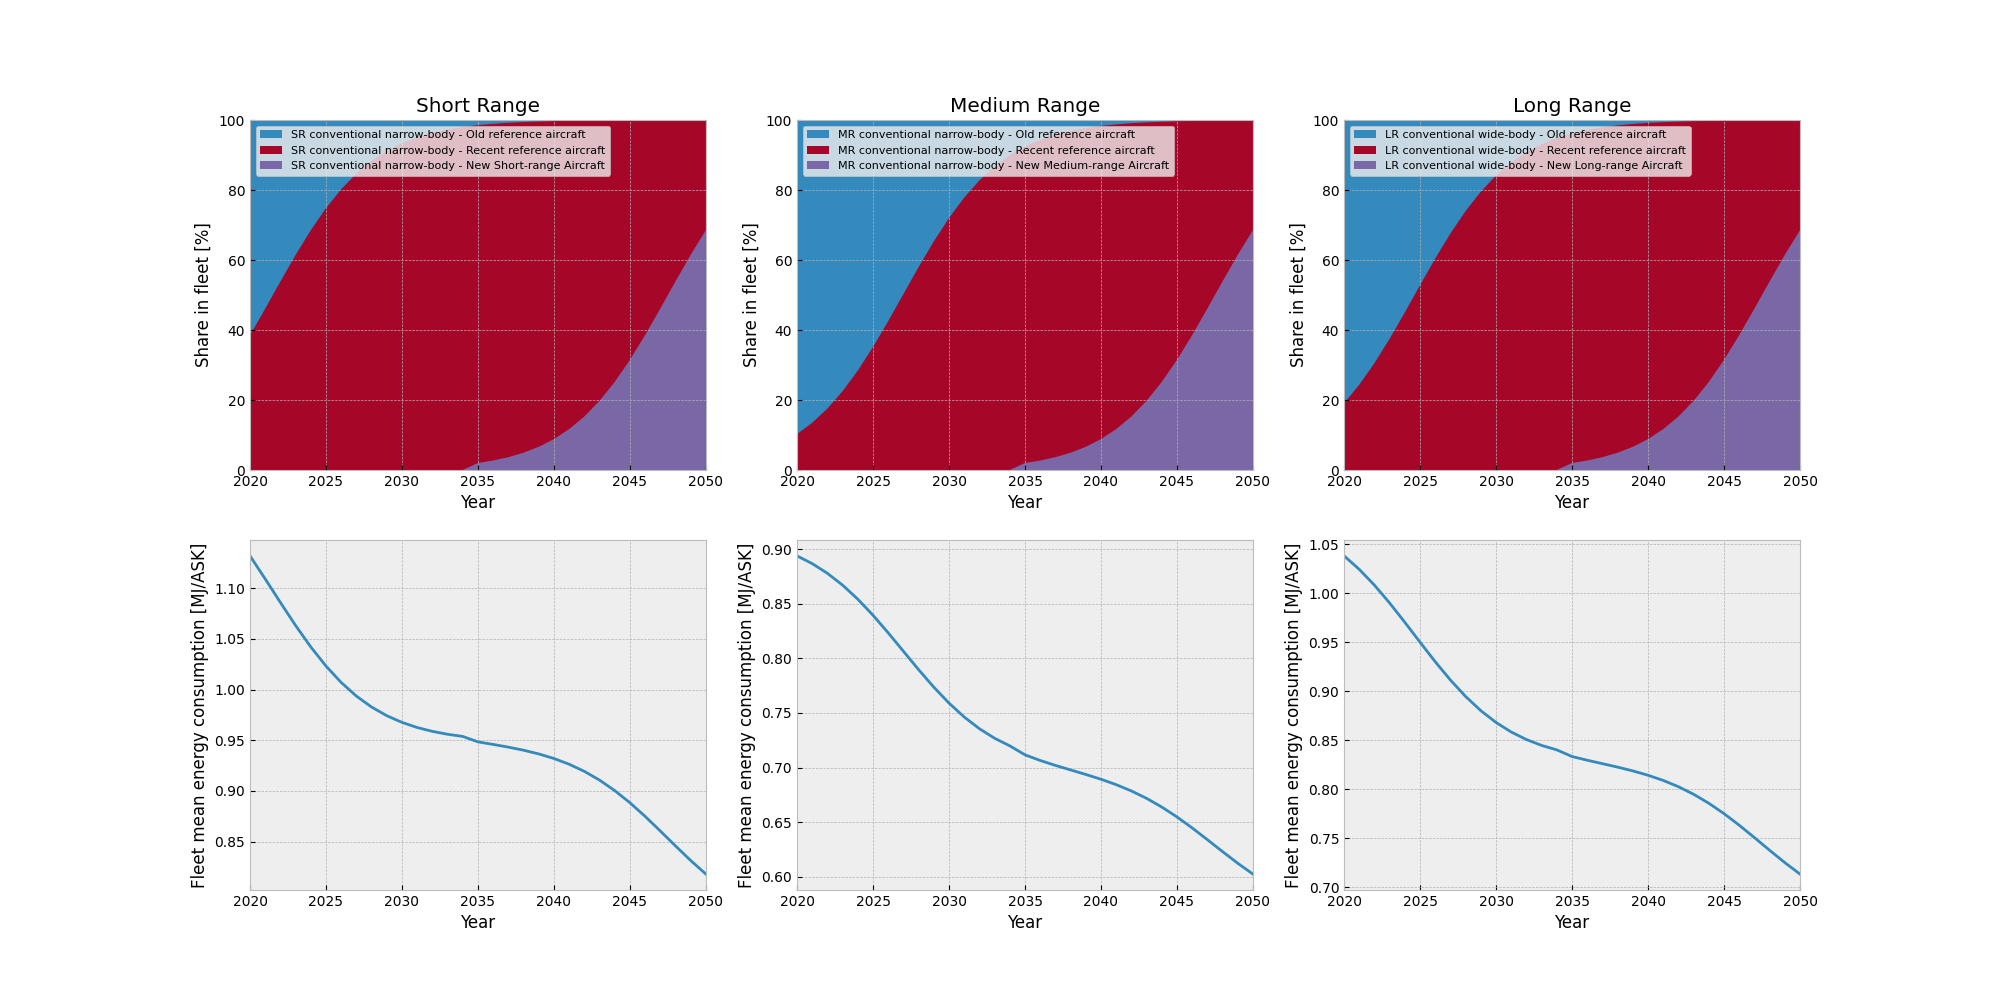

In [101]:
# Aircraft fleet

## Initialization
fleet = process.fleet

## Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
    ask_year=280000000,
    rc_cost=50000000,
    nrc_cost=10000000000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft", parameters=short_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
    ask_year=352000000.0,
    rc_cost=60000000.0,
    nrc_cost=10000000000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
    ask_year=912000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)

## Fleet renewal
fleet.categories["Short Range"].parameters.life = 25
fleet.categories["Medium Range"].parameters.life = 25
fleet.categories["Long Range"].parameters.life = 25

process.fleet_model.compute()
process.fleet_model.plot()

In [102]:
## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2025, 2030, 2035, 2040, 2045, 2050]
process.parameters.biofuel_share_reference_years_values = [0, 2, 4.8, 15, 24, 27, 35]  # [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
process.parameters.electrofuel_share_reference_years = [2020, 2025, 2030, 2035, 2040, 2045, 2050]
process.parameters.electrofuel_share_reference_years_values = [0, 0, 1.2, 5, 10, 15, 35]  # [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Share of photovoltaic in the electricity mix for efuel production
process.parameters.elec_solar_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.elec_solar_share_reference_years_values = [1.0, 1.0, 1.0, 1.0]

# Load factor of photovoltaic --> involves oversizing of electrolyzer and DAC capacities
process.parameters.load_factor_photovoltaic_reference_years: [2020, 2025, 2030, 2035, 2040, 2045, 2050]
process.parameters.load_factor_photovoltaic_reference_years_values: [0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14]  # [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 

# Set water vapor to zero (FIXME?)
process.parameters.emission_index_h2o_kerosene = 0.0
process.parameters.emission_index_h2o_biofuel = 0.0
process.parameters.emission_index_h2o_electrofuel = 0.0

## Compute

Once all the parameters have been set up, the user can compute.

In [103]:
import time
start_time = time.time()
process.compute()
print("--- %s seconds ---" % (time.time() - start_time))

--- 69.28007102012634 seconds ---


## Results

The user can then display the results. The user has access to float outputs but also to annual data outputs, with the possibility of choosing the output.

In [104]:
#process.data['vector_outputs']

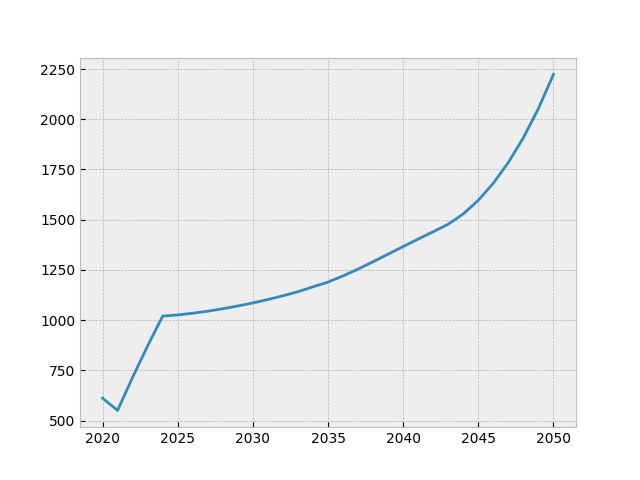

In [105]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots()
ax.plot(process.climate_outputs_df['co2_emissions'].loc[2020:])
plt.show()

In [106]:
process.lca_outputs_df.T

method acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq]  \
phase                                                                            _other_   
2020                                                                                   0   
2021                                                                                   0   
2022                                                                                   0   
2023                                                                                   0   
2024                                                                                   0   
2025                                                                                   0   
2026                                                                                   0   
2027                                                                                   0   
2028                                                                                   0   
2029                                                                                   0   
2030                                                                                   0   
2031                                                                                   0   
2032                                                                                   0   
2033                                                                                   0   
2034                                                                                   0   
2035                                                                                   0   
2036                                                                                   0   
2037                                                                                   0   
2038                                                                                   0   
2039                                                                                   0   
2040                                                                                   0   
2041                                                                                   0   
2042                                                                                   0   
2043                                                                                   0   
2044                                                                                   0   
2045                                                                                   0   
2046                                                                                   0   
2047                                                                                   0   
2048                                                                                   0   
2049                                                                                   0   
2050                                                                                   0   

method                                                     \
phase  aircraft_production     airport combustion_biofuel   
2020                     0 3.83535e+07                  0   
2021            2.1906e+07 5.49552e+07        3.42595e+06   
2022           2.44557e+07 7.02426e+07        8.71058e+06   
2023           2.64918e+07 8.42158e+07        1.55671e+07   
2024            2.7749e+07 9.68748e+07        2.37184e+07   
2025            3.2133e+07 9.56791e+07         2.9097e+07   
2026           3.50031e+07 9.60544e+07        3.42396e+07   
2027           3.52323e+07 9.63661e+07        3.91636e+07   
2028           3.44833e+07   9.661e+07        4.47046e+07   
2029            3.2974e+07 9.67818e+07        5.58319e+07   
2030           3.09227e+07  9.6877e+07        7.36433e+07   
2031           2.86743e+07 9.77737e+07        9.85136e+07   
2032           2.64292e+07  9.8637e+07        1.30892e+08   
2033           2.43419e+07 9.94641e+07        1.

## Plots

In [107]:
#process.climate_outputs_df['co2_emissions']

/var/folders/bj/j3yrbbzj53l6grkn2dx1yyjjf64gv1/T/ipykernel_85505/161613848.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4), constrained_layout=False)


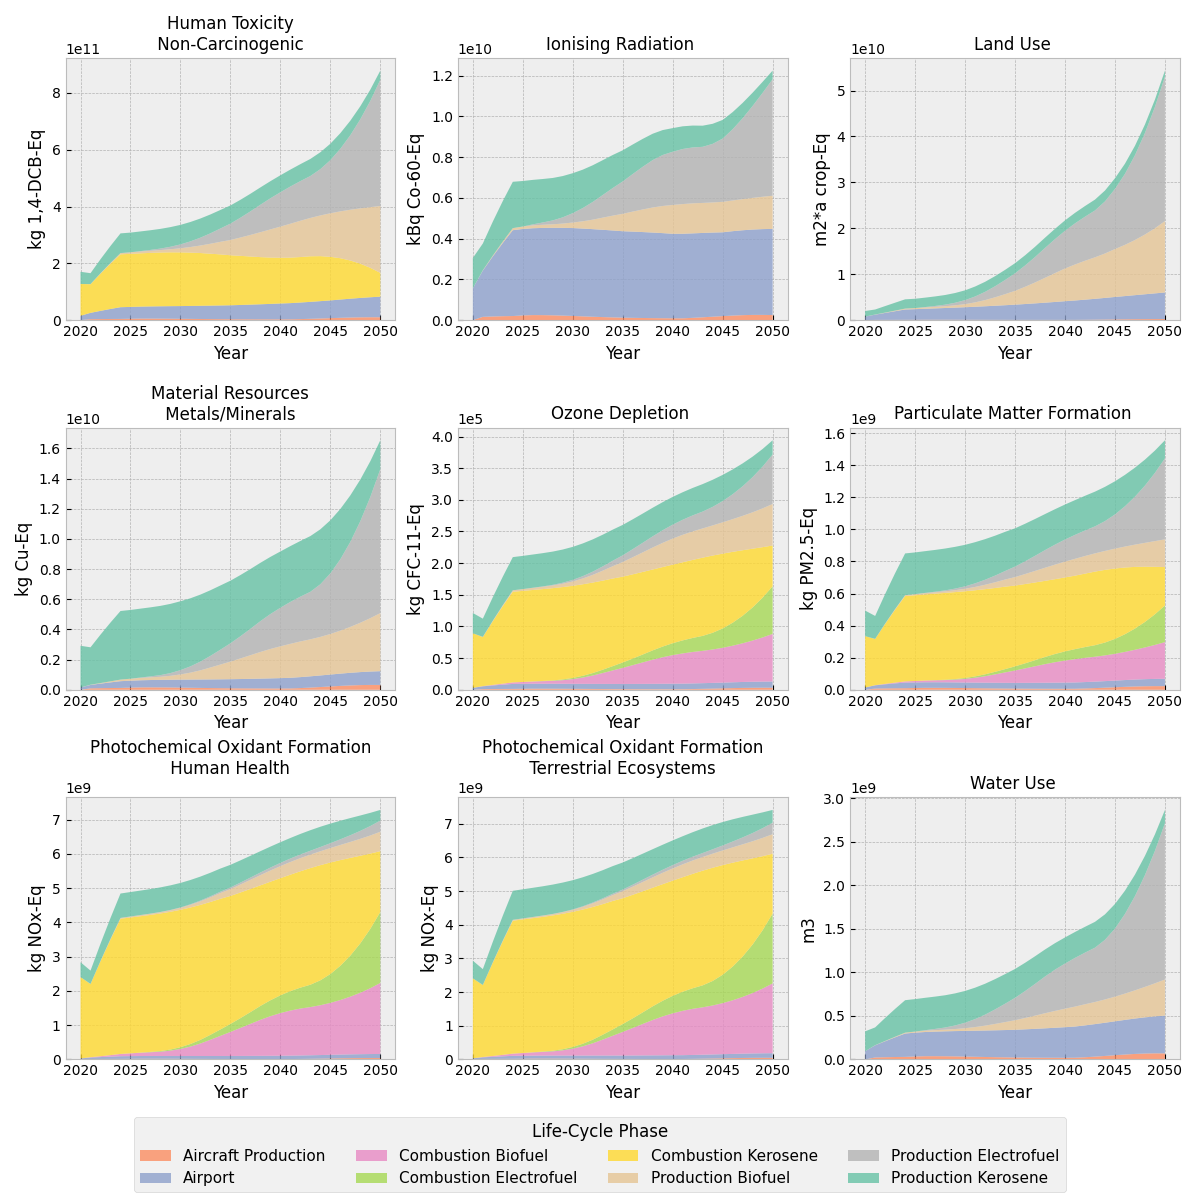

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import collections
plt.style.use('bmh')

plt.close()

def plot_stacked_evolution_subplots(df):
    # Remove phases containing 'sum'
    df_filtered = df[~df.index.get_level_values('phase').str.contains('sum')]
    
    methods = df_filtered.index.get_level_values('method').unique()[9:]
    years = df_filtered.columns
    
    # Determine the number of rows and columns for the subplots
    n_methods = len(methods)
    n_cols = 3 #2 if n_methods % 2 == 0 else 3
    n_rows = math.ceil(n_methods / n_cols)
    
    # Use seaborn color palette for better aesthetics
    palette = sns.color_palette("Set2", len(df_filtered.index.levels[1]))
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4), constrained_layout=False)
    axes = axes.flatten()  # Flatten the array of axes for easy iteration

    for i, method in enumerate(methods):
        df_method = df_filtered.xs(method, level='method')
        #df_method.index = df_method.index.str.replace('_', ' ')
        
        # Plot stacked area chart with custom colors
        axes[i].stackplot(years, df_method, labels=df_method.index, alpha=0.8, colors=palette)
        
        # Customize the subplot
        name, unit = method.split('[', 1)
        #name = name.replace('- ', '\n').replace('(', '\n(')
        name = name.replace('total', '')
        name = name.split('- ')[0]
        name = name.replace(':', '\n')
        name = "".join([a if a.isupper() else b for a,b in zip(name,name.title())])
        unit = unit.replace(']', '')
        axes[i].set_title(name, fontsize=12)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel(unit)
        axes[i].grid(True)
        axes[i].set_axisbelow(True)
        axes[i].ticklabel_format(axis='y', scilimits=(0,4))
        #if i == 0 or i == len(axes) - 1:
            #axes[i].legend()
    
    # Remove any empty subplots
    #for j in range(i + 1, len(axes)):
    #    fig.delaxes(axes[j])
    
    # Add a single legend for all subplots
    #handles, labels = axes[0].get_legend_handles_labels()
    #fig.legend(handles, labels, title='Phase', loc='lower center', ncol=4, bbox_to_anchor = (0, -0.01, 1, 1))#, mode="expand") #, ncol=len(df_filtered.index.levels[1]))
    #plt.tight_layout()
    
    # Collect legend labels from all plots.
    entries = collections.OrderedDict()
    for ax in axes.flatten():
        for handle, label in zip(*axes[0].get_legend_handles_labels()):
            #if 'biofuel' in label or 'electrofuel' in label:
            #    continue
            label_name = label.replace('_', ' ').title()
            entries[label_name] = handle
    legend = fig.legend(
        entries.values(), entries.keys(),
        loc='lower center', bbox_to_anchor=(0.5, 0),
        ncol=4,
        fontsize=11,
        title='Life-Cycle Phase',
        title_fontsize=12
    )

    # Set tight layout while keeping legend in the screen
    bbox = legend.get_window_extent(fig.canvas.get_renderer()).transformed(fig.transFigure.inverted())
    fig.tight_layout(rect=(0, bbox.y1, 1, 1), h_pad=0.5, w_pad=0.5)
    
    # show plot
    plt.show()

# Call the function
df_to_plot = process.lca_outputs_df[~process.lca_outputs_df.index.get_level_values('method').str.contains('total')]
#df_to_plot = process.lca_outputs_df[process.lca_outputs_df.index.get_level_values('method').str.contains('|'.join(['climate', 'land use', 'material']))]
plot_stacked_evolution_subplots(df_to_plot)
plt.savefig('lca_aeromaps_refueleu_fullsolar_loadfactor14percent_midpoints_2.pdf')

# Draft

In [72]:
import lca_algebraic as agb
import bw2analyzer as bwa
import bw2data
import bw2calc

test = agb.findActivity('treatment of fuel cell stack, 1MWe, PEM',  db_name='ecoinvent_cutoff_3.9_remind_SSP2-Base_2050', loc='RER')
test = agb.findActivity('electrolyzer production, 1MWe, PEM, Stack',  db_name='ecoinvent_cutoff_3.9_remind_SSP2-Base_2050', loc='RER')

lca = bw2calc.LCA(
    {test: 1},
    ('ReCiPe 2016 v1.03, midpoint (H)', 'human toxicity: non-carcinogenic', 'human toxicity potential (HTPnc)')
#    ('ReCiPe 2016 v1.03, midpoint (H)', 'water use', 'water consumption potential (WCP)')
    )

lca.lci()
lca.lcia()

print(lca.score)

169700.30146849356


In [80]:
test = agb.findActivity('hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity', db_name = 'ecoinvent_cutoff_3.9_remind_SSP2-Base_2050', loc = 'World')
test.listExchanges()

[('Oxygen', 'Oxygen' (kilogram, None, ('air',)), 5.942161339421612),
 ('Occupation, industrial area',
  'Occupation, industrial area' (square meter-year, None, ('natural resource', 'land')),
  0.00045119678096985113),
 ('Transformation, from industrial area',
  'Transformation, from industrial area' (square meter, None, ('natural resource', 'land')),
  2.2559839048492552e-05),
 ('Transformation, to industrial area',
  'Transformation, to industrial area' (square meter, None, ('natural resource', 'land')),
  2.2559839048492552e-05),
 ('electrolyzer production, 1MWe, PEM, Balance of Plant',
  'electrolyzer production, 1MWe, PEM, Balance of Plant' (unit, RER, None),
  2.81997988106157e-07),
 ('electrolyzer production, 1MWe, PEM, Stack',
  'electrolyzer production, 1MWe, PEM, Stack' (unit, RER, None),
  1.127991952424628e-06),
 ('market for water, deionised',
  'market for water, deionised' (kilogram, CH, None),
  0.01295793049262563),
 ('market for water, deionised',
  'market for water, 

In [77]:
test = agb.findActivity('hydrogen production, gaseous, 30 bar, from PEM electrolysis, from grid electricity\n[World]\n(remind_SSP2_Base_2050)',  db_name='Foreground DB')
test.listExchanges()

[('Oxygen', 'Oxygen' (kilogram, None, ('air',)), 5.942161339421612),
 ('Occupation, industrial area',
  'Occupation, industrial area' (square meter-year, None, ('natural resource', 'land')),
  0.00045119678096985113),
 ('Transformation, from industrial area',
  'Transformation, from industrial area' (square meter, None, ('natural resource', 'land')),
  2.2559839048492552e-05),
 ('Transformation, to industrial area',
  'Transformation, to industrial area' (square meter, None, ('natural resource', 'land')),
  2.2559839048492552e-05),
 ('electrolyzer production, 1MWe, PEM, Balance of Plant',
  'electrolyzer production, 1MWe, PEM, Balance of Plant' (unit, RER, None),
  2.81997988106157e-7/load_factor_photovoltaic),
 ('electrolyzer production, 1MWe, PEM, Stack',
  'electrolyzer production, 1MWe, PEM, Stack' (unit, RER, None),
  1.12799195242463e-6/load_factor_photovoltaic),
 ('market for water, deionised',
  'market for water, deionised' (kilogram, CH, None),
  0.01295793049262563),
 ('mark

In [ ]:
import lca_algebraic as agb

model = agb.newActivity(
    'Foreground DB', 
    'copy CO2',
    unit='kilogram',
    exchanges = {agb.findBioAct('water', categories=('air', 'lower stratosphere + upper troposphere')): 1.0}
)
#model = agb.findActivity('market_row', db_name='Foreground DB')
model.listExchanges()

In [ ]:
agb.findBioAct('water', categories=('water', 'fossil well')).as_dict()

In [ ]:
import bw2analyzer as bwa
import bw2data
import bw2calc

lca = bw2calc.LCA(
    {model: 1e6},
    ('ReCiPe 2016 v1.03, midpoint (H)', 'ozone depletion', 'ozone depletion potential (ODPinfinite)')
#    ('ReCiPe 2016 v1.03, midpoint (H)', 'water use', 'water consumption potential (WCP)')
    )

lca.lci()
lca.lcia()

print(lca.score)

# %% Contribution analysis
#lca.lci()
#lca.lcia()
#lca.characterized_inventory[:,lca.activity_dict.get(model.key)].sum()

ca = bwa.ContributionAnalysis()
contributions = ca.annotated_top_processes(lca)
print(sum([i[0] for i in contributions]))

In [ ]:
agb.findMethods('Available WAter')

In [ ]:
from functools import wraps

def kwargs_decorator():
    def wrapper(f):
        @wraps(f)
        def inner_wrapper(*args, **kwargs):
            dict_kwargs = args[0].lca_params
            new_kwargs = {**dict_kwargs, **kwargs}
            return f(*args, **new_kwargs)
        return inner_wrapper
    return wrapper

class Test:
    def __init__(self):
        self.lca_params = {'a': 1.0}
        
    @kwargs_decorator()
    def foo(self, **kwargs):
        print(kwargs)

In [ ]:
test = Test()
test.foo()

In [ ]:
from functools import wraps
import lca_algebraic as agb

def kwargs_decorator(dict_kwargs):
    def wrapper(f):
        @wraps(f)
        def inner_wrapper(*args, **kwargs):
            # dict_kwargs = args[0].my_dict  # args[0] refer to 'self'
            new_kwargs = {**dict_kwargs, **kwargs}
            return f(*args, **new_kwargs)
        return inner_wrapper
    return wrapper


def args_decorator(list_args):
    def wrapper(f):
        @wraps(f)
        def inner_wrapper(*args, **kwargs):
            # dict_kwargs = args[0].my_dict  # args[0] refer to 'self'
            new_args = {*args, *list_args}
            return f(*new_args, **kwargs)
        return inner_wrapper
    return wrapper


class Test:
        
    @args_decorator(agb.all_params().keys())
    def foo(self, *args, **kwargs):
        return args
    
    
test = Test()
test.__init__()
res = test.foo()
res

In [ ]:
from inspect import getfullargspec

getfullargspec(test.foo)

In [ ]:
list(agb.all_params().keys())

In [ ]:
class Test:
    def init(self):
        self.my_list = ['a', 'b']
    
    def foo(self, *args, **kwargs):
        
        
        def foo2(
        
        return args
    

In [ ]:
test = ['q', 1.0]

any(isinstance(elem, str) for elem in test)

In [ ]:
agb.findMethods?

In [ ]:
import lca_algebraic as agb

agb.findMethods('',mainCat='ReCiPe 2016 v1.03, endpoint (H)')

In [ ]:
import brightway2 as bw
from dotenv import load_dotenv
import bw2io
import bw2data
import os
import lca_algebraic as agb

bw2data.projects.set_current('example_methodology_ei391')
db = bw.Database('ecoinvent_cutoff_3.9_remind_SSP2-Base_2020')
#db = bw.Database('biosphere3')

In [ ]:
[act for act in db if 'Carbon dioxide' in act['name']]

In [ ]:
[act for act in db if 'kerosene production, via Fischer-Tropsch' in act['name']]

In [ ]:
act

In [ ]:
act.as_dict()

In [ ]:
import lca_algebraic as agb
import pandas as pd
from sympy.parsing.sympy_parser import parse_expr
from sympy import Float
import bw2data
from typing import List, Union

USER_DB = 'Foreground DB'
DEFAULT_PROJECT = 'lcav_default_project'


def list_processes(model, foreground_only: bool = True, custom_attribute: str = None) -> pd.DataFrame:
    """
    Traverses the tree of sub-activities (sub-processes) until background database is reached.
    """

    def _recursive_activities(act,
                              activities, units, locations, parents, exchanges, levels, dbs, custom_attributes,
                              parent: str = "", exc: dict = None, level: int = 0):

        if exc is None:
            exc = {}
        name = act.as_dict()['name']
        unit = act.as_dict()['unit']
        loc = act.as_dict().get('location', "")
        if loc not in ['GLO', '']:
            name += f' [{loc}]'
        exchange = _getAmountOrFormula(exc)
        db = act.as_dict()['database']
        custom_attr = act.as_dict().get(custom_attribute, "")  # get any additional attribute asked by the user

        # Stop BEFORE reaching the first level of background activities
        if foreground_only and db != USER_DB:
            return

        activities.append(name)
        units.append(unit)
        locations.append(loc)
        parents.append(parent)
        exchanges.append(exchange)
        levels.append(level)
        dbs.append(db)
        custom_attributes.append(custom_attr)

        # Stop AFTER reaching the first level of background activities
        if db != USER_DB:
            return

        for exc in act.exchanges():
            if exc.input != act:
                _recursive_activities(exc.input, activities, units, locations, parents, exchanges, levels, dbs, custom_attributes,
                                      parent=name,
                                      exc=exc,
                                      level=level + 1)
        return

    # Initialize lists
    activities = []
    units = []
    locations = []
    parents = []
    exchanges = []
    levels = []
    dbs = []
    custom_attributes = []

    # Recursively populate lists
    _recursive_activities(model, activities, units, locations, parents, exchanges, levels, dbs, custom_attributes)
    data = {'activity': activities,
            'unit': units,
            'location': locations,
            'level': levels,
            'database': dbs,
            'parent': parents,
            'exchange': exchanges,
            }
    if custom_attribute:
        data[custom_attribute] = custom_attributes

    # Create DataFrame
    df = pd.DataFrame(data, index=activities)

    return df


def get_parameter(key: str):
    param = agb.params._param_registry().__getitem__(key)
    return param


def expandParams(param, value=None):
    """
    Modified version of expandParams from classes EnumParam and ParamDef from lca_algebraic library.
    For enum (switch) parameters, returns a dictionary of single enum values as sympy symbols,
    with only a single one set to 1.
    For float parameters, returns a dictionary with either the user-provided value or the default parameter value.
    """

    # Enum (e.g. switch) parameters
    if param['type'] == 'enum':
        values = param['values'] + [None]

        # Bad value ?
        if value not in values:
            raise Exception("Invalid value %s for param %s. Should be in %s" %
                            (value, param['name'], str(param['values'])))

        res = dict()
        for enum_val in values:
            var_name = "%s_%s" % (param['name'], enum_val if enum_val is not None else "default")
            res[var_name] = 1.0 if enum_val == value else 0.0
        return res

    # Float parameters
    else:
        if value is None:
            value = param['default']
        return {param['name']: value}


def completeParamValues(params, param_registry, setDefaults=True):
    """
    Modified version of completeParamValues from lca_algebraic library.
    Sets default values for missing parameters and expand enum params.

    Returns
    -------
        Dict of param_name => float value
    """

    # Set default variables for missing values
    if setDefaults:
        for name, param in param_registry.items():
            if not name in params:
                params[name] = param['default']
                agb.warn(
                    "Required param '%s' was missing, replacing by default value : %s" % (name, str(param['default'])))

    res = dict()
    for key, val in params.items():
        if key in param_registry:
            param = param_registry[key]
        else:
            continue
            # raise Exception("Parameter not found : %s. Valid parameters : %s" % (key, list(param_registry.keys())))

        if isinstance(val, list):
            newvals = [expandParams(param, val) for val in val]
            res.update(agb.params._listOfDictToDictOflist(newvals))
        else:
            res.update(expandParams(param, val))

    return res


def format_number(num, precision=2):
    """
    This function takes a number (either a Python float or a SymPy Float) and a precision,
    and returns a string that represents the number with the given precision.
    If the number is too large or too small, it switches to scientific notation.

    :param num: The number to format.
    :param precision: The number of decimal places to use.
    :return: A string that represents the number with the given precision.
    """
    if isinstance(num, Float):  # SymPy float
        num = num.evalf()
    sci_num = "{:.{}e}".format(num, precision)
    if 'e+00' in sci_num:
        return "{:.{}f}".format(num, precision)
    else:
        return sci_num


def _getAmountOrFormula(ex):
    """ Return either a fixed float value or an expression for the amount of this exchange"""
    if 'formula' in ex:
        expr = parse_expr(ex['formula'])
        try:
            float(expr)
            return format_number(float(expr))
        except TypeError:
            return expr
    elif 'amount' in ex:
        return format_number(ex['amount'])
    return ""


def safe_delete_brightway_project(projectname: str) -> None:
    try:
        bw2data.projects.delete_project(
            name = projectname,
            delete_dir = True
        )
    except:
        pass

In [ ]:
model = agb.findActivity('model', db_name='Foreground DB')
model = agb.findActivity('kerosene production, synthetic, Fischer Tropsch process, hydrogen from electrolysis, energy allocation', 
                         loc='World',
                         db_name='ecoinvent_cutoff_3.9_remind_SSP2-Base_2050')

In [ ]:
from IPython.display import display

#total_elec = 0
total_elec = 0.015703571134020617

for exc in model.exchanges():
    res = agb.compute_impacts(
        exc.input, 
        agb.findMethods("'ReCiPe 2016 v1.03, midpoint (H)', 'climate change', 'global warming potential (GWP100)'")
    )
    print(exc.amount / total_elec * 100)
    display(res)
    #if 'electricity' in exc.input.as_dict()['name']:
    #    total_elec+=exc.amount
        
print(total_elec)

In [ ]:
agb.findMethods("'ReCiPe 2016 v1.03, midpoint (H)', 'climate change', 'global warming potential (GWP100)'")

In [ ]:
model = agb.findActivity('kerosene production, synthetic, Fischer Tropsch process, hydrogen from electrolysis, energy allocation', 
                         loc='World',
                         db_name='ecoinvent_cutoff_3.9_remind_SSP2-Base_2020')
name = 'market group for electricity*'
model.getExchange(name, single='*' not in name)

In [ ]:
[exc.input.as_dict()['name'] for exc in model.exchanges()]